# Create a Square Wave with Fourier Series

Can we express basically any periodic function/signal as a sum of just cosines and sines with different frequencies?  
Yes! This notebook will demonstrate that a square wave function of 1 Hz can be constructed as a sum of sine functions in the form below: 

$$
x(t)
= \sin(2\pi t)
+ \frac{\sin(3 \cdot 2\pi t)}{3}
+ \frac{\sin(5 \cdot 2\pi t)}{5}
+ \dots \frac{\sin(N \cdot 2\pi t)}{N}
$$

$x(t)$ as a function of time t , and with odd number N.

In [1]:
import numpy as np
from matplotlib import pyplot as plt

First, create the square wave function and the first sine term in the above equation

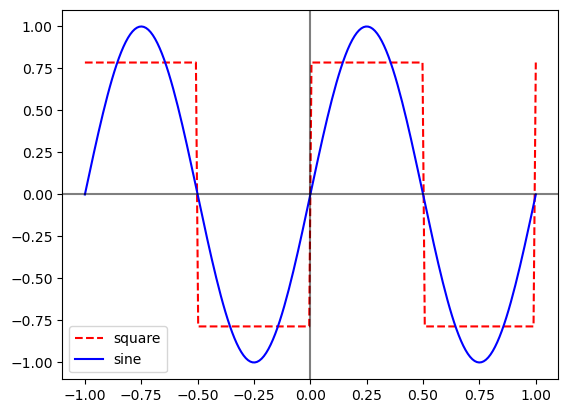

In [2]:
from scipy.signal import square
L = 1
t = np.linspace(- L, L, 200) # 200 time steps from -1 to 1 seconds
ysquare = square(2 * np.pi * t) * np.pi / 4
x1 = np.sin(2 * np.pi* t)
plt.plot(t, ysquare, 'r--', label='square')
plt.plot(t, x1, 'b-', label='sine')
plt.axhline(0, color='k', alpha=0.5)
plt.axvline(0, color='k', alpha=0.5)
plt.legend();

Now, we add the second sine term x2

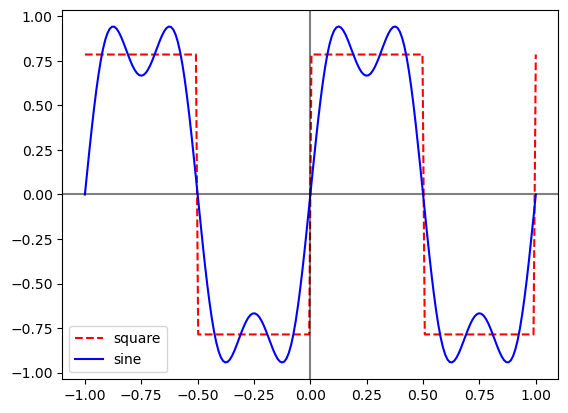

In [3]:
x2 = 1 / 3 * np.sin(2 * np.pi * 3 * t)
plt.plot(t, ysquare, 'r--', label='square')
plt.plot(t, x1 + x2, 'b-', label='sine')
plt.axhline(0, color='k', alpha=0.5)
plt.axvline(0, color='k', alpha=0.5)
plt.legend();

Then, the third sine term x3. We see that a square wave starts to take shape as more terms are included.

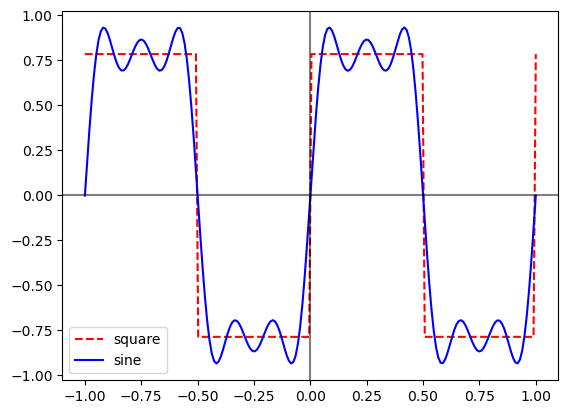

In [4]:
x3 = 1 / 5 * np.sin(2 * np.pi * 5 * t)
plt.plot(t, ysquare, 'r--', label='square')
plt.plot(t, x1 + x2 + x3, 'b-', label='sine')
plt.axhline(0, color='k', alpha=0.5)
plt.axvline(0, color='k', alpha=0.5)
plt.legend();

To observe the effects of adding more sine terms, we define a function to do so. 

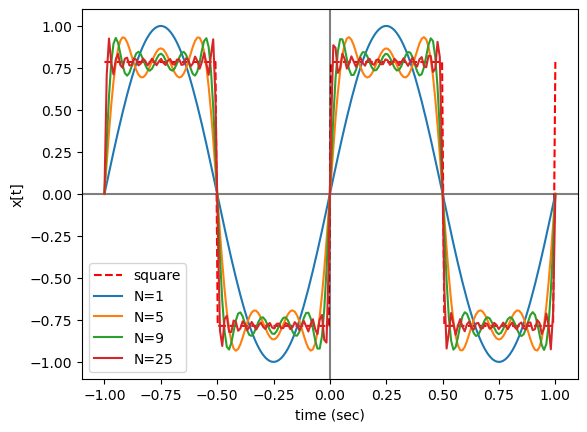

In [5]:
# Define variables 
x = np.zeros(len(t)) # create x array that is the same length as t 
odds = np.arange(1,1000,2) # array consists of odd numbers from 1,3,5, to 999

# Define a function that takes certain length of odds array as inputs to construct the x series
def transform(number, plot=False, print_value=False):
    """
    number: the length of the odds array that is used for constructing signal x(t) in array x
    """
    for i in range(len(t)):
        term = []
        for j in range(len(odds[0:number])):
            term.append(1 / odds[j] * np.sin(2 * np.pi * odds[j] *t[i]))
        x[i] = np.sum(term)
    if plot==True:
        plt.plot(t,x, label=f'N={odds[number-1]}')
        plt.xlabel('time (sec)')
        plt.ylabel('x[t]')
        plt.legend()
    if print_value==True:
        return x

# Take a look at the x series given by different number of sine terms
# Test number of terms N = 1,9,19,49

plt.figure()
plt.plot(t, ysquare,'r--', label='square')
plt.axhline(0, color='k', alpha=0.5)
plt.axvline(0, color='k', alpha=0.5)
for number in (np.array([1, 5, 9, 25]) + 1) / 2:
    transform(int(number), True, False)
# You can replace any odd number with np.array([1, 5, 9, 25]) to see the effect of using different number of sine terms (N)

## Using SymPy!

The calculation of Fourier series is (among others) implemented in SymPy, see [documentation](https://docs.sympy.org/latest/modules/series/fourier.html#sympy.series.fourier.fourier_series). The calculations above are repeated using sympy:

In [32]:
import sympy as sym
x = sym.symbols('x')
N = sym.symbols('N')
f = sym.Heaviside(x+1)/2 - sym.Heaviside(x+1/2)+sym.Heaviside(x) - sym.Heaviside(x-1/2)
s = sym.fourier_series(f, (x, 0, 1))
s1  = s.truncate(1)
s5  = s.truncate(5)
s9  = s.truncate(9)
s25 = s.truncate(25)
display(s5)

2*sin(2*pi*x)/pi + 2*sin(6*pi*x)/(3*pi) + 2*sin(10*pi*x)/(5*pi) + 2*sin(14*pi*x)/(7*pi) + 2*sin(18*pi*x)/(9*pi)

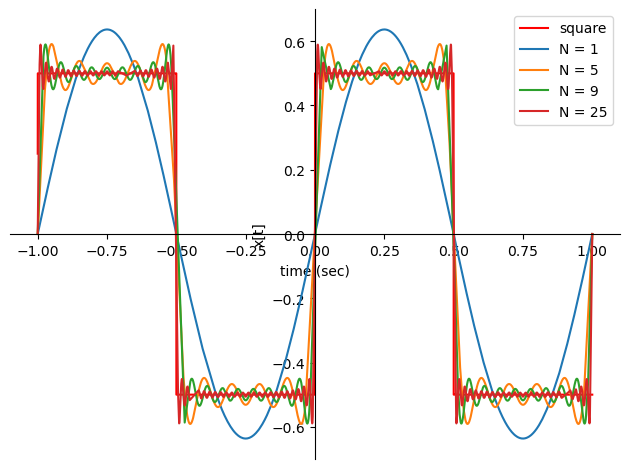

In [33]:
p = sym.plot(f, s1, s5, s9, s25, (x, -1, 1), show=False, legend=True,ylabel='x[t]',xlabel=('time (sec)'))
p[0].line_color = 'red'
p[0].label = 'square'
p[1].label = 'N = 1'
p[2].label = 'N = 5'
p[3].label = 'N = 9'
p[4].label = 'N = 25'
p.show()

## Conclusion

We can observe that the created function becomes more like a square wave function as the number of terms (N) increases. So, a square wave function can be simulated by a sum of harmonically related sine functions.